# Documentation
## Load the toolbox

In [1]:
import image3d.image3d as image3d
import image3d.xcorr3d as xcorr3d
import image3d.load_data as load_data

## Build the image3d object

image3d object is taking to parameter as input :

1) an image which is a numpy array of dimention N*M*L (gray level image)
2) a float which the the resolution of the image


It can be read from N tiff file sorted in one folder using the function load_data.load_image_from_tiff (one tiff file per layer)

Here we will build a synthetic image

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

### Building an image
Here is an example of a binary image, where 1 can be interpret as fracture for instance

In [3]:
size=200 #number of voxel size³
center=size/2

# image
im=np.zeros([size,size,size])


# disk image
rd=int(10)
disk=np.zeros([2*(rd+1),2*(rd+1)])
for i in list(range(2*rd+2)):
    for j in list(range(2*rd+2)):
        if ((i-(rd+1))**2+(j-(rd+1))**2<rd**2):
            disk[i,j]=1
            
# adding disk image
for i in list(range(4)):
    k1=center
    for j in [-1,1]:
        k=int(center+j*i*28)
        im[int(center-2),int(k1-rd-1):int(k1+rd+1),int(k-rd-1):int(k+rd+1)]=disk
        im[int(center-1),int(k1-rd-1):int(k1+rd+1),int(k-rd-1):int(k+rd+1)]=disk
        im[int(center-0),int(k1-rd-1):int(k1+rd+1),int(k-rd-1):int(k+rd+1)]=disk
        
res=1 # resolution of the image, size of the Voxel
data=image3d.image3d(im,res)

### Ploting an image

Text(0.5, 1.0, 'Image, Y section, Y=0.5')

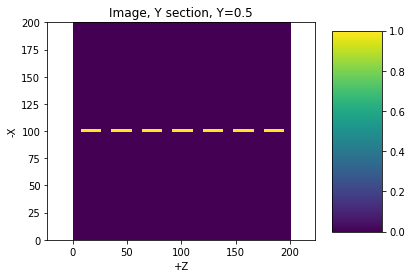

In [4]:
plt.figure()
data.plot('Y',0.5)
plt.title('Image, Y section, Y=0.5')

Text(0.5, 1.0, 'Image, X section, X=0.5')

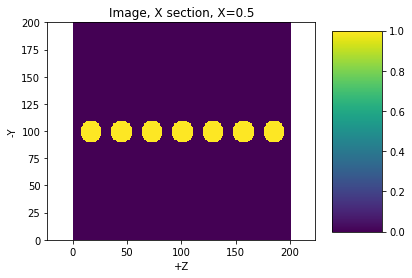

In [5]:
plt.figure()
data.plot('X',0.5)
plt.title('Image, X section, X=0.5')

Text(0.5, 1.0, 'Image, Z section, Z=0.5')

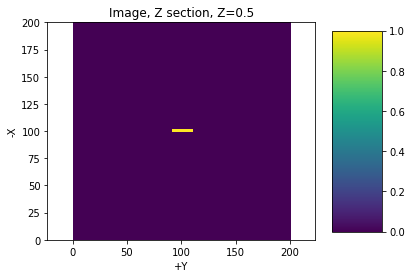

In [6]:
plt.figure()
data.plot('Z',0.5)
plt.title('Image, Z section, Z=0.5')

## Data analysis
### Autocorrelation function
#### Equations

For detail see Doumalin et al. 2003 (french) or Kanit et al. 2003
The autocorrelation $C (\vec{h})$ function of the 3D image $f(\vec{x})$ is defined as :


$C(\vec{h})=\frac{\int_Vf(\vec{x})f(\vec{x}+\vec{h})dV}{\int_Vf^2(\vec{x})dV}$ 


Where $\vec{x}$ and $\vec{x}+\vec{h}$ are point describing the volume $V$ of the image.

We can defined and infinite value as :

$C_\infty=\frac{<f>^2_V}{<f^2>_V}$
    
Where $<.>_V$ is the mean on the volume V
    
#### Computation

In [7]:
print ('Begining autocorrelation', time.asctime())
autocorr=data.xcorr3d()
print ('End autocorrelation', time.asctime())

Begining autocorrelation Tue Apr 28 08:47:19 2020
End autocorrelation Tue Apr 28 08:47:20 2020


#### Figures

Text(0.5, 1.0, 'Image, Y section, Y=0.5')

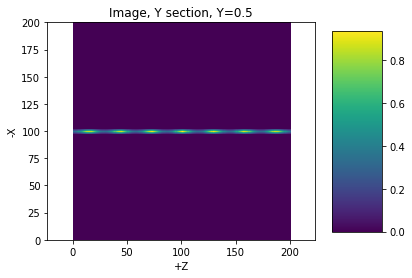

In [8]:
plt.figure()
autocorr.plot('Y',0.5)
plt.title('Image, Y section, Y=0.5')

Text(0.5, 1.0, 'Image, X section, Y=0.5')

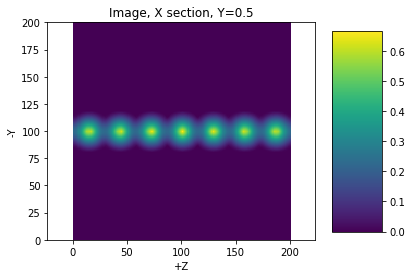

In [9]:
plt.figure()
autocorr.plot('X',0.5)
plt.title('Image, X section, Y=0.5')

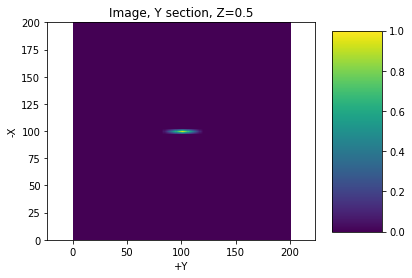

In [10]:
plt.figure()
autocorr.plot('Z',0.5)
plt.title('Image, Y section, Z=0.5')
plt.clim(0,1)

### Autocorrelation length $\lambda_p$

The autocorrelation length can be defined with two different definition that can give differemt result.

#### 1) Autocorrelation length : intersection definition $\lambda_{p1}$
 
Autocorelation radius in a direction $\vec{v}$ is defined as the postition the first intersection of $C_{\vec{v}}$ and $C_\infty$. $C_{\vec{v}}$ is the profil of $C$ in the direction $\vec{v}$.

#### 2) Autocorrelation length : integrale definition $\lambda_{p2}$

$\lambda_{p2}=\int_0^\infty (C_{\vec{v}}(r)-C_\infty) dr$

In practice it is compute as : 

$\lambda_{p2}=\int_0^{X_{0,p}} (C_{\vec{v}}(r)-C_\infty) dr$


Where $X_{0,p}$ is the autocorelation length in the direction p.


Both autocorrelation radius can give differente result and the first definition $\lambda_{p1}$ can even have no value. It mean that the correlation length in the direction $\vec{v}$ is higher than the sample size.

#### Profil along y axis

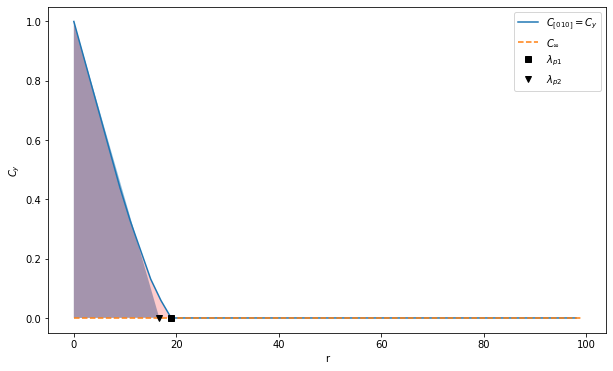

In [11]:
y=np.array([0,1,0])
center=np.ones(3)*size/2
end=np.ones(3)*size/2
end[1]=size-1
[res,xl]=autocorr.extract_profil(center,end)
id=np.where(res<autocorr.Cinf)

plt.figure(figsize=(10,6))
plt.plot(xl,res,label='$C_{[010]}=C_y$')
plt.plot([0,99],[autocorr.Cinf,autocorr.Cinf],'--',label='$C_\infty$')
if id[0].shape[0]>1:
    plt.plot(xl[id[0][0]],res[id[0][0]],'sk',label='$\lambda_{p1}$')
plt.xlabel('r')
plt.ylabel('$C_y$')
plt.legend()
plt.grid()

xi=2.*np.trapz(res-autocorr.Cinf,xl)

X = np.array([[0,0], [0,1], [xi, autocorr.Cinf]])
t1 = plt.Polygon(X,alpha=0.5)

xy=np.transpose(np.concatenate([xl,res]).reshape(([2,99])))
ii=np.array([[0.,autocorr.Cinf]])
ie=np.array([[xl[-1],autocorr.Cinf]])
xy=np.concatenate((np.concatenate((ie,ii),axis=0),xy))

t2 = plt.Polygon(xy,facecolor='r',alpha=0.2)

plt.gca().add_patch(t1)
plt.gca().add_patch(t2)

plt.plot(xi,autocorr.Cinf,'vk',label='$\lambda_{p2}$')

plt.legend()
plt.grid()



#### Profil alonf z axis

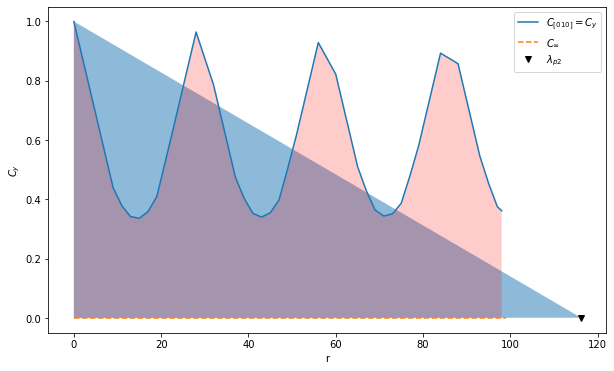

In [12]:
z=np.array([0,0,1])
center=np.ones(3)*size/2
end=np.ones(3)*size/2
end[2]=size-1
[res,xl]=autocorr.extract_profil(center,end)
id=np.where(res<autocorr.Cinf)

plt.figure(figsize=(10,6))
plt.plot(xl,res,label='$C_{[010]}=C_y$')
plt.plot([0,99],[autocorr.Cinf,autocorr.Cinf],'--',label='$C_\infty$')
if id[0].shape[0]>1:
    plt.plot(xl[id[0][0]],res[id[0][0]],'sk',label='$\lambda_{p1}$')
plt.xlabel('r')
plt.ylabel('$C_y$')
plt.legend()
plt.grid()

xi=2.*np.trapz(res-autocorr.Cinf,xl)

X = np.array([[0,0], [0,1], [xi, autocorr.Cinf]])
t1 = plt.Polygon(X,alpha=0.5)

xy=np.transpose(np.concatenate([xl,res]).reshape(([2,99])))
ii=np.array([[0.,autocorr.Cinf]])
ie=np.array([[xl[-1],autocorr.Cinf]])
xy=np.concatenate((np.concatenate((ie,ii),axis=0),xy))

t2 = plt.Polygon(xy,facecolor='r',alpha=0.2)

plt.gca().add_patch(t1)
plt.gca().add_patch(t2)

plt.plot(xi,autocorr.Cinf,'vk',label='$\lambda_{p2}$')

plt.legend()
plt.grid()

#### Autocorrelation length in function of the orientation

The autocorelation length can be compute in every direction and than plot in a pole figure

$\mathbf{\lambda_{p1}}$

It show some infinty value along **z** axis a shown by the back marker

Begining stereo proj Tue Apr 28 08:47:22 2020
End stereo proj Tue Apr 28 08:47:34 2020


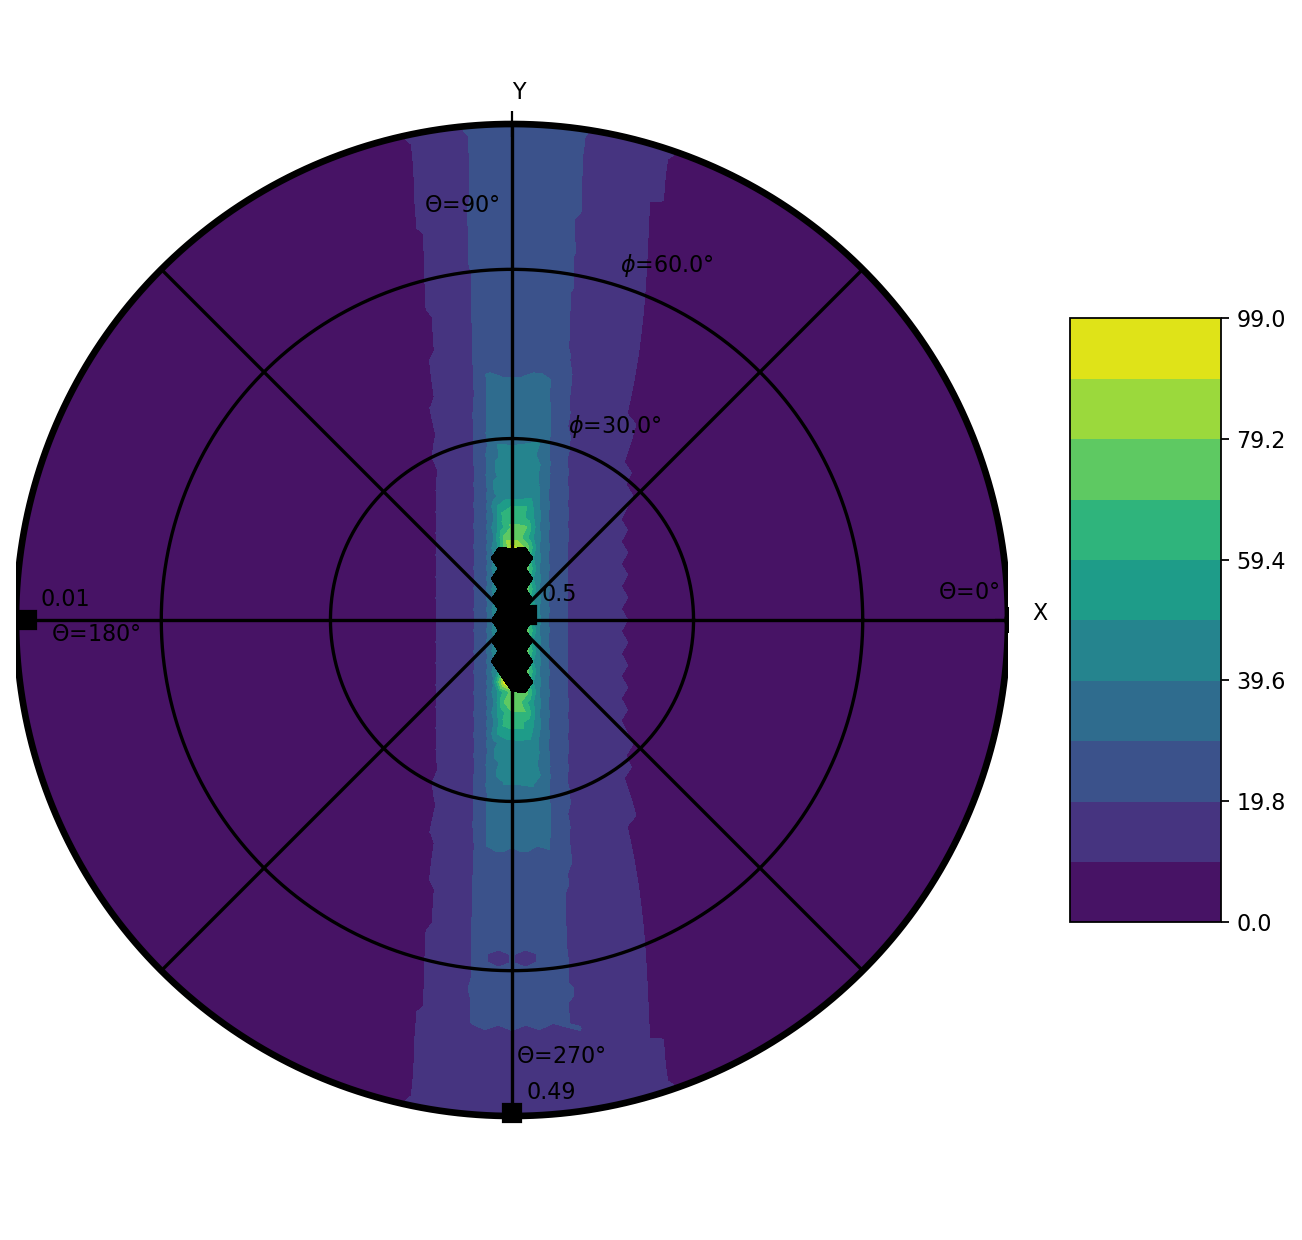

In [13]:
print ('Begining stereo proj', time.asctime())
[eigvalue,eigvector,radiusmean,radiusstd,xmin,rmax]=autocorr.stereographic_corr_length(coeffCinf=np.array([1.]),pc=15)
print ('End stereo proj', time.asctime())

$\mathbf{\lambda_{p2}}$

Using the second definition does not show infinit value by contruction.

Begining stereo proj Tue Apr 28 08:47:34 2020
End stereo proj Tue Apr 28 08:47:45 2020


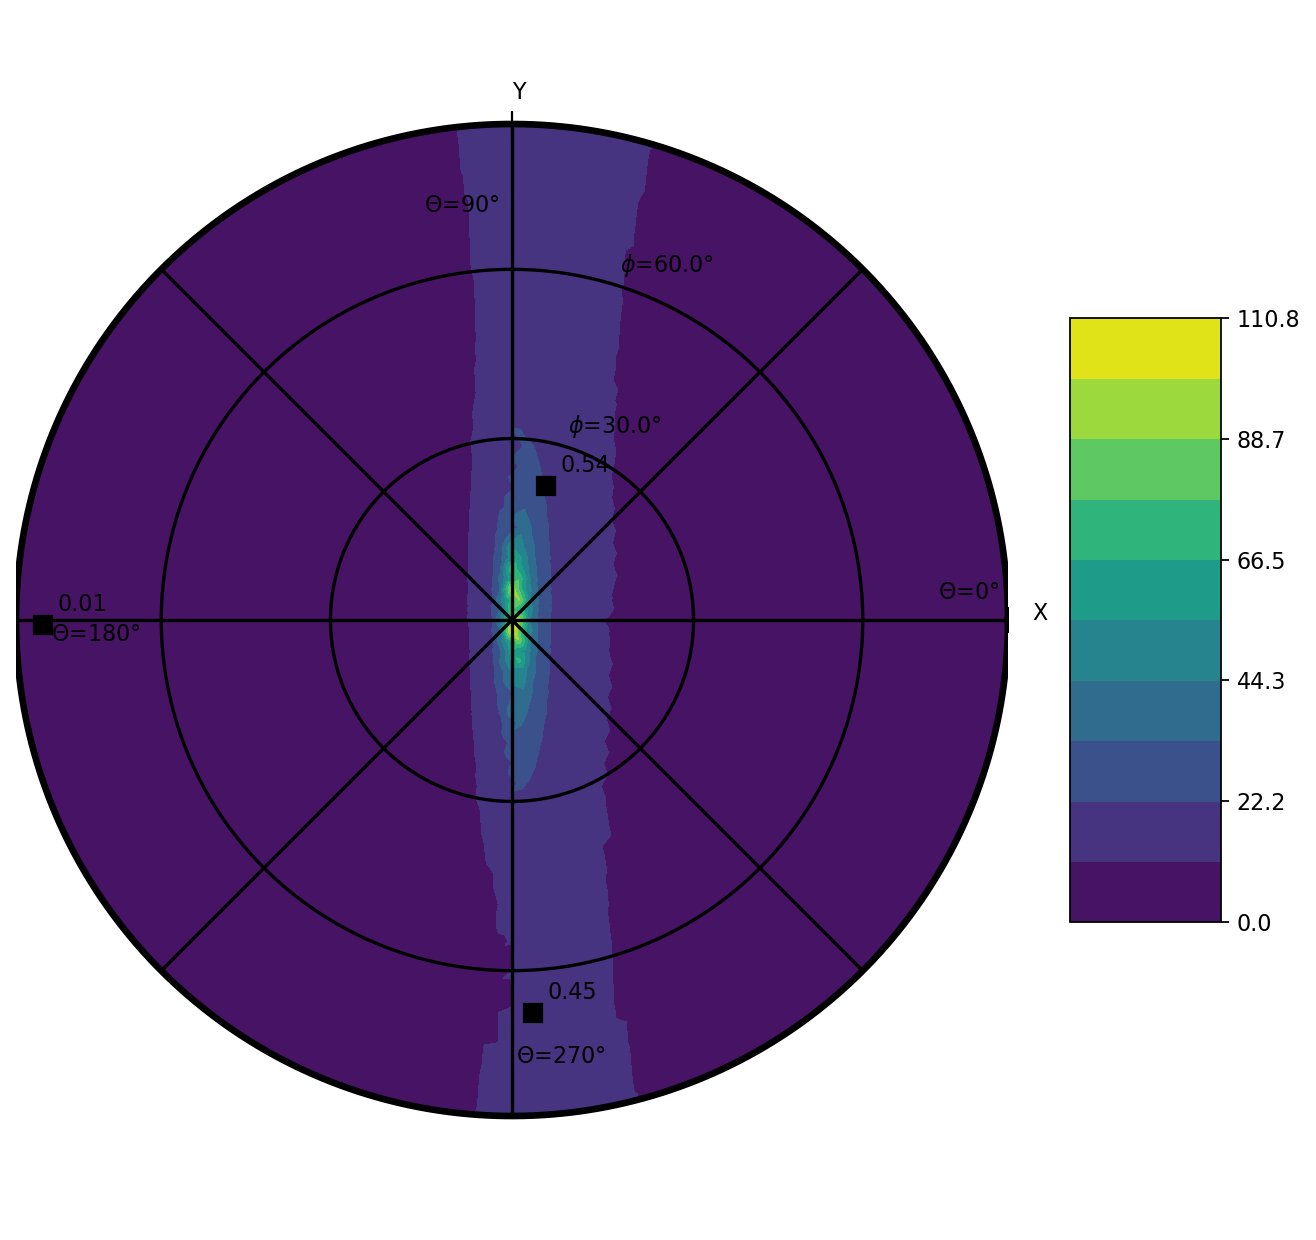

In [14]:
print ('Begining stereo proj', time.asctime())
[eigvalue,eigvector,radiusmean,radiusstd,xmin,rmax]=autocorr.stereographic_corr_length(coeffCinf=np.array([1.]),pc=15,usePI=True)
print ('End stereo proj', time.asctime())

### Submaxima and periodicity

The submaxima of the autocorelation function can be interesting to find typical distance and orientation in the image.
Here is a way to find them :

In [15]:
coor,vc,val=autocorr.local_maxima()

Sub-maxima position $\vec{h}=[x,y,z]$ and $C(\vec{h})$

In [16]:
for i in list(range(len(val))):
    print('h=[x,y,z] :'+str(coor[i])+', C(h))='+str(round(val[i],2)))

h=[x,y,z] :[100 100 184], C(h))=0.89
h=[x,y,z] :[100 100 156], C(h))=0.93
h=[x,y,z] :[100 100 128], C(h))=0.96


Axis direction with the associate $C(\vec{h})$ value 

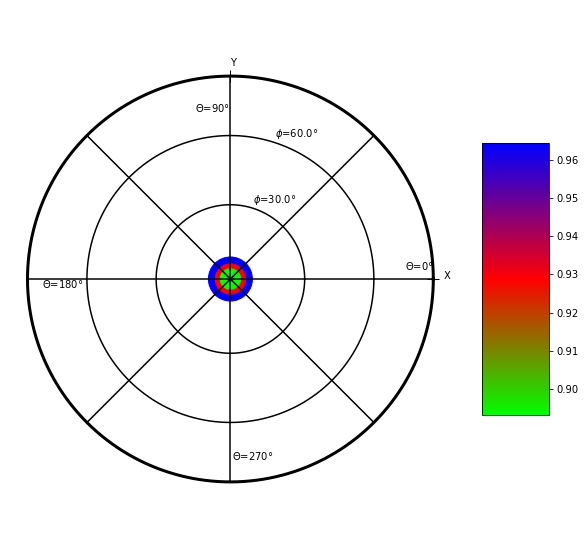

In [17]:
import matplotlib.cm as cm
plt.figure(figsize=(10,10))
vc.plot_vector(val[::-1],size=val[::-1]**20*4000,cm=cm.brg_r)

Submaxima on the profil

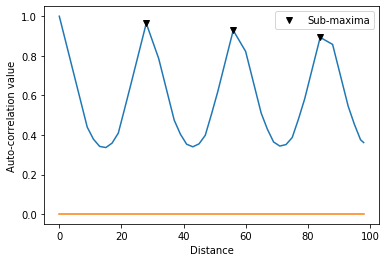

In [18]:
import setvector3d.setvector3d as sv3d
vc=sv3d.setvector3d(np.array([[0,0,1],[0,0,1]]))
autocorr.correlation_profil(vc.vector[0])
plt.plot(coor[:,2]-center,val,'vk',label='Sub-maxima')
plt.legend()

Submaxima on autocorrelation slice

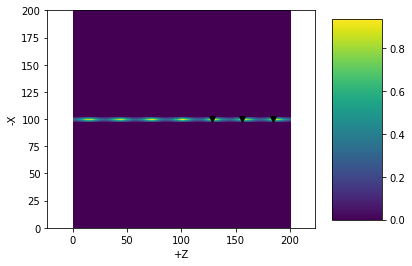

In [19]:
autocorr.plot('Y',0.5)
plt.plot(coor[:,2],center,'vk',label='Sub-maxima')